In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# from matplotlib import cm
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [2]:
delfi_data_path = '../../delfi_data_cancer_detection/number_of_sites_analysis/merged_data/30000-sites_reformatted.txt'
lung_data_path = '../../lung_validation_cancer_detection/TFBS_nucleosome_profiling_30000sites/analysis/merged_data/30000_reformatted.txt'


In [3]:
#select the PCA features to plot
xax = 'PC_0'
yax = 'PC_1'

In [4]:
#import the delfi data set
delfi_data = pd.read_csv(delfi_data_path, sep='\t')
delfi_data = delfi_data.set_index('sample')
delfi_data = delfi_data.sort_index()
delfi_data['cohort'] = 'DELFI'
# delfi_data['group'] = np.where(delfi_data['status']==1,'delfi_cancer','delfi_healthy')
#delfi_data = delfi_data.rename(columns = {'Age at Diagnosis':'age','Gender':'sex'})
print('delfi',len(delfi_data))
delfi_data.head()


delfi 423


,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender,site_group,central_coverage_AHR.hg38.30000,central_coverage_AR.hg38.30000,central_coverage_ARNT.hg38.30000,...,mean_coverage_ZNF341.hg38.30000,mean_coverage_ZNF35.hg38.30000,mean_coverage_ZNF384.hg38.30000,mean_coverage_ZNF449.hg38.30000,mean_coverage_ZNF467.hg38.30000,mean_coverage_ZNF554.hg38.30000,mean_coverage_ZNF580.hg38.30000,mean_coverage_ZNF770.hg38.30000,mean_coverage_ZSCAN16.hg38.30000,cohort
sample,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F,30000-sites,0.96701,1.07815,1.00625,...,0.94214,0.96241,0.93693,1.00252,0.95153,0.97131,0.91894,0.97111,0.94607,DELFI
Bile_Duct_Cancer_CGPLPA115,0.05922,1,Bile_Duct_Cancer,IV,NaN,M,30000-sites,0.96940,1.09246,1.01414,...,0.94686,0.96902,0.93733,1.00303,0.95612,0.97666,0.93451,0.97026,0.94892,DELFI
Bile_Duct_Cancer_CGPLPA117,0.00000,1,Bile_Duct_Cancer,II,NaN,M,30000-sites,0.94975,1.05398,0.98592,...,0.94070,0.96597,0.94499,1.00058,0.95245,0.97357,0.92254,0.97559,0.94216,DELFI
Bile_Duct_Cancer_CGPLPA118,0.02789,1,Bile_Duct_Cancer,I,68.0,F,30000-sites,0.97940,1.07926,1.00665,...,0.93694,0.96055,0.93115,1.00251,0.94900,0.97330,0.91060,0.97051,0.94264,DELFI
Bile_Duct_Cancer_CGPLPA122,0.04373,1,Bile_Duct_Cancer,II,62.0,F,30000-sites,0.95472,1.06126,1.01024,...,0.93414,0.95507,0.92978,0.99936,0.94021,0.96927,0.90046,0.96809,0.94869,DELFI


In [5]:
#import the lucas and validation data set
lung_data = pd.read_csv(lung_data_path, sep='\t')
lung_data = lung_data.set_index('sample')
lung_data = lung_data.sort_index()
lung_data = lung_data.rename(columns = {'Age':'age','Sex':'sex'})

print('total',len(lung_data))
print('\n')

#split the lucas and validation sets
LUCAS_data = lung_data[(lung_data['group']=='LUCAS_cancer') | (lung_data['group']=='LUCAS_healthy')]
validation_data = lung_data[(lung_data['group']=='validation_cancer') | (lung_data['group']=='validation_healthy')]

print('LUCAS',len(LUCAS_data))
print(LUCAS_data['status'].value_counts())
print('\n')

print('validation',len(validation_data))
print(validation_data['status'].value_counts())

del(lung_data)

total 850


LUCAS 287
0    158
1    129
Name: status, dtype: int64


validation 431
0    385
1     46
Name: status, dtype: int64


In [6]:
data = delfi_data.append(LUCAS_data).append(validation_data)
print('merged',len(data))

del(delfi_data,LUCAS_data,validation_data)
data.head()

merged 1141


,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender,site_group,central_coverage_AHR.hg38.30000,central_coverage_AR.hg38.30000,central_coverage_ARNT.hg38.30000,...,cohort,Prior cancer,Future cancer,Biopsy location,cancer_present,group,file_id,histology,age,sex
sample,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F,30000-sites,0.96701,1.07815,1.00625,...,DELFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bile_Duct_Cancer_CGPLPA115,0.05922,1,Bile_Duct_Cancer,IV,NaN,M,30000-sites,0.96940,1.09246,1.01414,...,DELFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bile_Duct_Cancer_CGPLPA117,0.00000,1,Bile_Duct_Cancer,II,NaN,M,30000-sites,0.94975,1.05398,0.98592,...,DELFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bile_Duct_Cancer_CGPLPA118,0.02789,1,Bile_Duct_Cancer,I,68.0,F,30000-sites,0.97940,1.07926,1.00665,...,DELFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bile_Duct_Cancer_CGPLPA122,0.04373,1,Bile_Duct_Cancer,II,62.0,F,30000-sites,0.95472,1.06126,1.01024,...,DELFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#get features and exclude all other columns
central_cov_features = data.columns[(data.columns.str.startswith('central_coverage'))]
mean_cov_features = data.columns[(data.columns.str.startswith('mean_coverage'))]
amplitude_features = data.columns[(data.columns.str.startswith('amplitude'))]

all_features = central_cov_features.append(mean_cov_features).append(amplitude_features)
print('central cov',len(central_cov_features))
print('mean cov',len(mean_cov_features))
print('amplitude',len(amplitude_features))
print('Features',len(all_features))


feature_dict = {'all_features':all_features,
               'central_coverage': central_cov_features,
               'mean_coverage': mean_cov_features,
               'amplitude': amplitude_features}

del(central_cov_features,mean_cov_features,amplitude_features,all_features)


central cov 270
mean cov 270
amplitude 270
Features 810


In [8]:
status_dict = {'Healthy':[0],'Cancer':[1],'All':[0,1]}

In [9]:
data['status'].value_counts()

0    758
1    383
Name: status, dtype: int64

In [10]:
#color by cohort
group_dict = {'LUCAS':['tab:red','o'],
                'validation':['tab:purple','v'],
             'DELFI':['tab:green','s']}

color_list = []
symbol_list = []
for cohort in data['cohort']:
    color_list.append(group_dict[cohort][0])
    symbol_list.append(group_dict[cohort][1])

data['color_by_cohort'] = color_list
data['symbol_by_cohort'] = symbol_list


In [29]:
def make_plot(current,grouping,ax,legend):
    ax.set_title(status + ' - ' + feature_name)
    
    for group in current[grouping].unique():
        number = len(current[current[grouping]==group])
        alpha = 30/number #alter intensity based on number of samples in group
        ax.scatter(current[current[grouping]==group][xax],
                    current[current[grouping]==group][yax], 
                    color = current[current[grouping]==group]['color_by_'+grouping],
                   marker = current[current[grouping]==group]['symbol_by_'+grouping].values[0], alpha = 0.2, label = group + '(n=' + str(number)+')')
    
    
    pct_xax = pca.explained_variance_ratio_[np.int32(xax.split('_')[1])]
    pct_xax = str(np.round(pct_xax*100,1))

    pct_yax = pca.explained_variance_ratio_[np.int32(yax.split('_')[1])]
    pct_yax = str(np.round(pct_yax*100,1))

    ax.set_xlabel(xax + ' ('+pct_xax+'%)')
    ax.set_ylabel(yax + ' ('+pct_yax+'%)')

    if legend:
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
   

In [30]:
feature_dict.keys()

dict_keys(['all_features', 'central_coverage', 'mean_coverage', 'amplitude'])

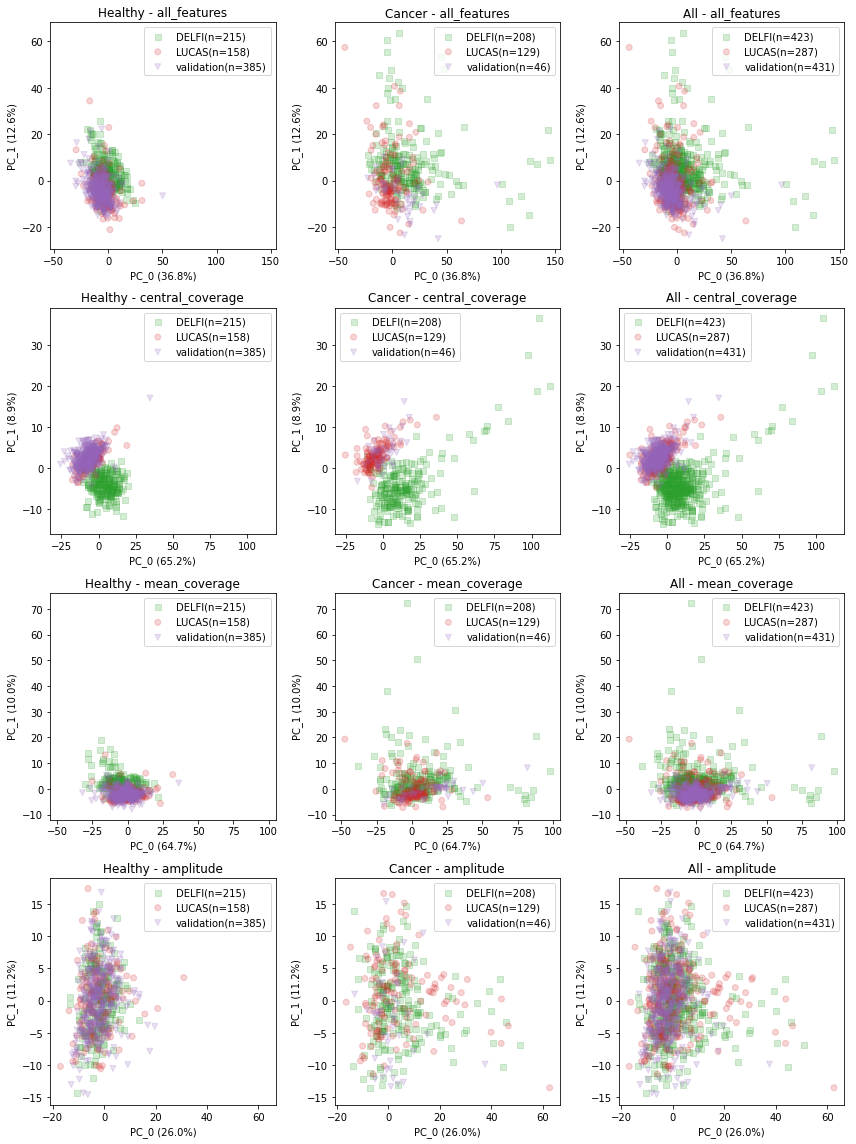

In [31]:
fig,axes = plt.subplots(4,3,figsize = (12,16), sharex = 'row', sharey = 'row')

for i,feature_name in enumerate(['all_features', 'central_coverage', 'mean_coverage', 'amplitude']):
    df = data.copy()
    
    #scale the selected samples
    features = feature_dict[feature_name]
    scaler = StandardScaler()
    scaler.fit(df[features])
    df[features] = scaler.transform(df[features])
    # df[features].mean()

    #perform PCA
    n_components = min(len(features), len(df))
    pca = PCA(n_components=n_components)
    PCs = pca.fit_transform(df[features])
    principal_components = pd.DataFrame(data = PCs , columns = ['PC_'+str(m) for m in np.arange(n_components)], index= df.index)

    #plot each group of samples
    for j,status in enumerate(['Healthy','Cancer','All']):
        
        #pick out the samples of interest
        status_values = status_dict[status]
        current = df[df['status'].isin(status_values)][['color_by_cohort','symbol_by_cohort','cohort']]
        current = current.merge(principal_components, left_index=True,right_index=True)
        
        make_plot(current,'cohort',axes[i,j],legend=True)
        axes[i,j].tick_params(labelleft=True)

fig.tight_layout()
plt.savefig('plots/dataset_pca.pdf')